### Thesis
#### Carlos Chew

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('barreno.csv')
print(df)

     SKU   Precio   Marca   Modelo     Fecha    Departamento 
0    3467    1500   bosch    gsr18v   8/26/19  quetzaltenango
1    2456    1250  makita    xph12z    7/5/18  quetzaltenango
2    2456    1250  makita    xph12z   9/17/20  quetzaltenango
3    3467    1500   bosch    gsr18v   3/14/15       guatemala
4    3467    1500   bosch    gsr18v   2/25/20       guatemala
..    ...     ...     ...       ...       ...             ...
995  3467    1500   bosch    gsr18v    5/4/17       guatemala
996  3467    1500   bosch    gsr18v   8/15/19  quetzaltenango
997  2456    1250  makita    xph12z  12/12/17       guatemala
998  1453    1150  dewalt  dcd771c2   12/1/16  quetzaltenango
999  2456    1250  makita    xph12z   5/31/16  quetzaltenango

[1000 rows x 6 columns]


In [3]:
df.head()

,SKU,Precio,Marca,Modelo,Fecha,Departamento
0,3467,1500,bosch,gsr18v,8/26/19,quetzaltenango
1,2456,1250,makita,xph12z,7/5/18,quetzaltenango
2,2456,1250,makita,xph12z,9/17/20,quetzaltenango
3,3467,1500,bosch,gsr18v,3/14/15,guatemala
4,3467,1500,bosch,gsr18v,2/25/20,guatemala


In [4]:
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 800
No. of testing examples: 200


In [5]:
print("Rows     : ", training_data.shape[0])
print("Columns  : ", training_data.shape[1])
print("\nFeatures : \n", training_data.columns.tolist())
print("\nMissing values :  ", training_data.isnull().sum().values.sum())
print("\nUnique values :  \n", training_data.nunique())

print("Test", testing_data.shape, "Train", testing_data.shape)

Rows     :  800
Columns  :  6

Features : 
 ['SKU ', 'Precio', 'Marca', 'Modelo ', 'Fecha ', 'Departamento ']

Missing values :   0

Unique values :  
 SKU                3
Precio             3
Marca              3
Modelo             3
Fecha            663
Departamento       2
dtype: int64
Test (200, 6) Train (200, 6)


In [6]:
testing_data.info()

testing_data.duplicated(subset=None, keep="first")
print("Test", testing_data, "Train", training_data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 8 to 998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SKU            200 non-null    int64 
 1   Precio         200 non-null    int64 
 2   Marca          200 non-null    object
 3   Modelo         200 non-null    object
 4   Fecha          200 non-null    object
 5   Departamento   200 non-null    object
dtypes: int64(2), object(4)
memory usage: 10.9+ KB
Test      SKU   Precio   Marca   Modelo     Fecha    Departamento 
8    3467    1500   bosch    gsr18v  11/27/15       guatemala
14   1453    1150  dewalt  dcd771c2    7/6/17       guatemala
15   1453    1150  dewalt  dcd771c2   3/16/16  quetzaltenango
20   1453    1150  dewalt  dcd771c2   5/26/20       guatemala
22   3467    1500   bosch    gsr18v   1/27/19       guatemala
..    ...     ...     ...       ...       ...             ...
983  3467    1500   bosch    gsr18v    1/3/15       guatemala


In [7]:
pd.options.display.min_rows = 115
training_data.isnull().sum().sort_values(ascending=False)

print("Test", testing_data.shape, "Train", training_data.shape)

Test (200, 6) Train (800, 6)


In [8]:
pd.set_option("display.max_columns", None)
training_data.describe()

,SKU,Precio
count,800.00000,800.000000
mean,2505.20875,1307.500000
std,816.57817,147.698234
min,1453.00000,1150.000000
25%,1453.00000,1150.000000
50%,2456.00000,1250.000000
75%,3467.00000,1500.000000
max,3467.00000,1500.000000


In [9]:
testing_data.describe()

,SKU,Precio
count,200.000000,200.000000
mean,2443.715000,1300.250000
std,847.487605,150.834988
min,1453.000000,1150.000000
25%,1453.000000,1150.000000
50%,2456.000000,1250.000000
75%,3467.000000,1500.000000
max,3467.000000,1500.000000


/Users/wech/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


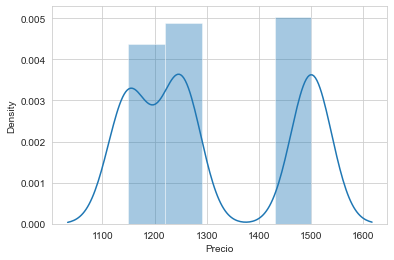

/Users/wech/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


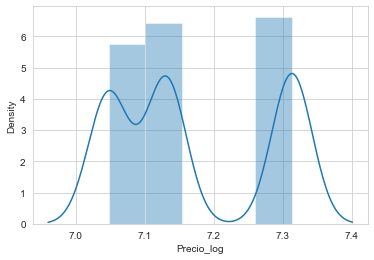

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

x = training_data.Precio
sns.set_style("whitegrid")
sns.distplot(x)
plt.show()

training_data["Precio_log"] = np.log(training_data.Precio)
x = training_data.Precio_log
sns.distplot(x)
plt.show()

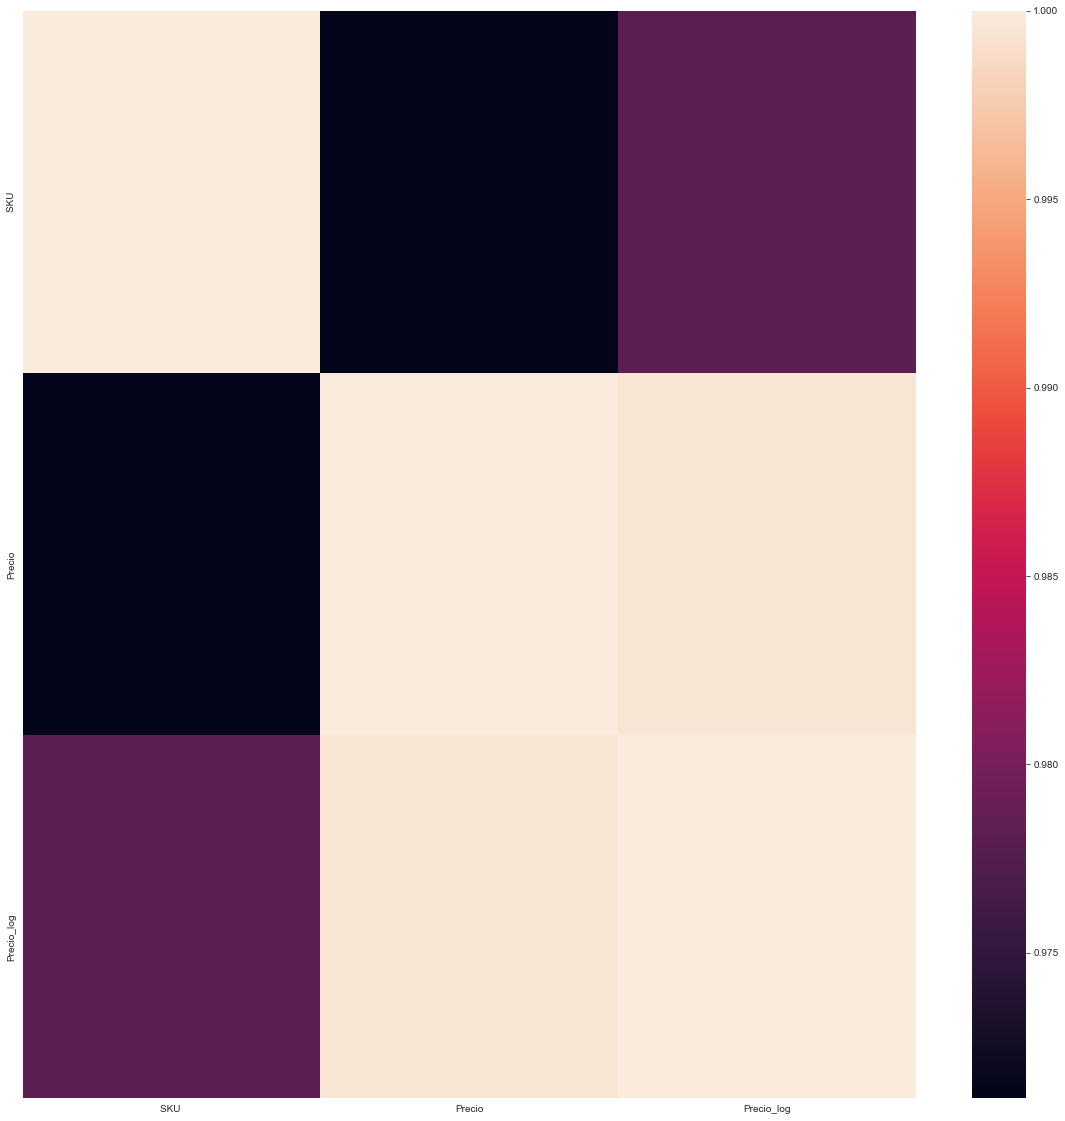

In [11]:
plt.figure(figsize=(20, 20))
sns.heatmap(training_data.corr())
plt.savefig("barrenos.png")

<Figure size 720x720 with 0 Axes>

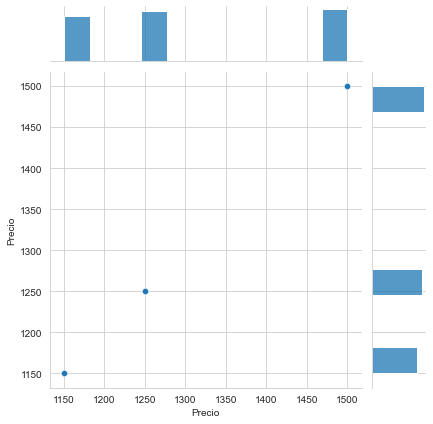

In [16]:
y = training_data.Precio
features = [
    "Precio"
]

for features in features:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    x = training_data[features]
    sns.jointplot(x=x, y=y, data=training_data)

ValueError: Image size of 143208x216 pixels is too large. It must be less than 2^16 in each direction.

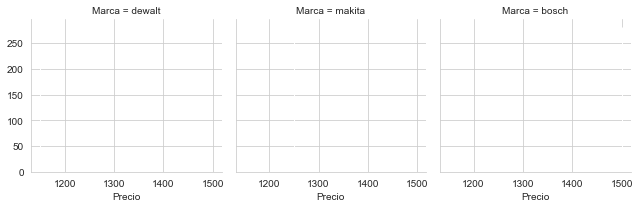

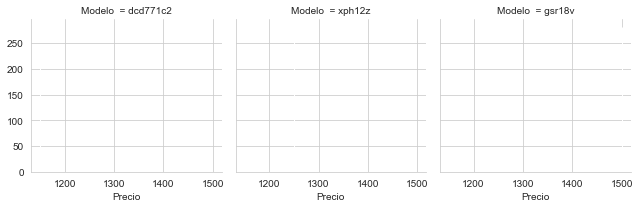

ValueError: Image size of 143208x216 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 143208x216 with 663 Axes>

In [17]:
features = training_data.select_dtypes(include=['object']).columns

for features in features:
    g = sns.FacetGrid(training_data, col=features)
    g.map(plt.hist, 'Precio');